# WELCOME TO MY FINAL PROJECT FOR THE DL SPECIALIZATION! :D

## WHY THIS PROJECT:

### For this final project, I decided to predict the CAC40 using different ML models. The CAC40 is the equivalent of the S&P500, except it's for the 40 biggest french companies. I chose this project because I've seen many projects of the same kind for the US and Indian stock market, but not so for the french market. I decided to collect my own dataset by using the Yahoo finance API instead of looking at Kaggle, so this way we have the entire pipeline for an ML project, from Data Collection to model building. Also, the CAC40 is a good index because it's relatively recent (it was created in early 1990), so we have enough historical data to build a robust model while at the same time not polluting our models with useless historical data from the 1930's or 1940's.         
### When I looked at other projects of the same type, I noticed that most either use some kind of supervised model, others use a Deep Learning approach, but not a lot of people try and compare the two. So in this project we will compare a Supervised approach with a Long Short Term Memory model, which we will build from the ground up and implement it ourselves. I will explain to you why I chose specific models in the model building part.   
### This project is split into five parts:
- Introduction and case study for this project
- Data Acquisition and EDA
- Building a Supervised model
- Building a Deep Learning model and Hyperparameter tuning
- Comparing the different models and conclusion
- What we can do to iterate on this project      


# PART 1: INTRODUCTION & CASE STUDY    
## Let's say your represent an investment fund which only invests in indexes, not in individual companies: you'd want to maximize your investment by accurately predicting if the price at the closing time of the market is up or down, which will dictate to you when to buy or sell. But how do you go about building such a model ? Or even, what kind of model should you use ? A simple supervised approach will perhaps do the trick and will be easily explainable, but will it perform agains more State of the art algorithm ? Can one even predict the trends in the french stock market? Let's see ! 

# PART 2: DATA ACQUISITION & EDA     
### Import required libraries:

In [ ]:
try:
  import yfinance as yf
except:
  !pip install yfinance
  import yfinance as yf
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

### We use the symbol for the CAC40, which is ^FCHI, to obtain the data via Yahoo finance API. In our query, we select max which will give us all the data from the creation of the index until today. 

In [ ]:
cac40 = yf.Ticker("^FCHI")

In [ ]:
cac40 = cac40.history(period='max')

In [ ]:
cac40

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1990-03-01 00:00:00+01:00,1836.000000,1838.000000,1827.000000,1832.000000,0,0,0
1990-03-02 00:00:00+01:00,1831.000000,1860.000000,1831.000000,1860.000000,0,0,0
1990-03-05 00:00:00+01:00,1866.000000,1874.000000,1862.000000,1874.000000,0,0,0
1990-03-06 00:00:00+01:00,1869.000000,1875.000000,1866.000000,1872.000000,0,0,0
1990-03-07 00:00:00+01:00,1874.000000,1881.000000,1874.000000,1880.000000,0,0,0
...,...,...,...,...,...,...,...
2022-11-30 00:00:00+01:00,6706.669922,6743.600098,6678.750000,6738.549805,137628600,0,0
2022-12-01 00:00:00+01:00,6784.600098,6791.310059,6730.549805,6753.970215,76833000,0,0
2022-12-02 00:00:00+01:00,6728.859863,6767.720215,6689.759766,6742.250000,73971700,0,0


In [ ]:
cac40.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,8318.000000,8318.000000,8318.000000,8318.000000,8.318000e+03,8318.0,8318.0
mean,3993.848768,4021.956716,3962.996485,3993.429728,6.435243e+07,0.0,0.0
std,1416.330942,1424.089956,1408.109643,1416.114453,6.865887e+07,0.0,0.0
min,1438.000000,1459.000000,1425.000000,1441.000000,0.000000e+00,0.0,0.0
25%,2964.539978,2993.727478,2929.150024,2962.322449,0.000000e+00,0.0,0.0
50%,4056.334961,4082.994995,4025.724976,4054.650024,6.622655e+07,0.0,0.0
75%,5073.930176,5106.015015,5042.057617,5075.280029,1.122782e+08,0.0,0.0
max,7320.479980,7384.859863,7313.529785,7376.370117,5.312476e+08,0.0,0.0


### We can safely get rid of the Dividends and Stock splits columns as they are useful when predicting the price of a particular stock of a company, not of an index (an index cannot do a stock-split for instance, whereas Amazon just did one a few months ago). Furthermore, since we use an API which was built with Data Science in mind, we can see that the indexes in our dataframe corresponds to the trading date, which is quite useful.

In [ ]:
cac40.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

In [ ]:
cac40.index

DatetimeIndex(['1990-03-01 00:00:00+01:00', '1990-03-02 00:00:00+01:00',
               '1990-03-05 00:00:00+01:00', '1990-03-06 00:00:00+01:00',
               '1990-03-07 00:00:00+01:00', '1990-03-08 00:00:00+01:00',
               '1990-03-09 00:00:00+01:00', '1990-03-12 00:00:00+01:00',
               '1990-03-13 00:00:00+01:00', '1990-03-14 00:00:00+01:00',
               ...
               '2022-11-23 00:00:00+01:00', '2022-11-24 00:00:00+01:00',
               '2022-11-25 00:00:00+01:00', '2022-11-28 00:00:00+01:00',
               '2022-11-29 00:00:00+01:00', '2022-11-30 00:00:00+01:00',
               '2022-12-01 00:00:00+01:00', '2022-12-02 00:00:00+01:00',
               '2022-12-05 00:00:00+01:00', '2022-12-06 00:00:00+01:00'],
              dtype='datetime64[ns, Europe/Paris]', name='Date', length=8318, freq=None)

### The plot below shows the trend of the CAC40. We can see that it went up from 2000 to about 8000, which means that it quadrupled in only 30 years. That's a pretty good trend, especially if you invested early. However, we can also notice that there is a high volatility, especially during the different financial crises, when all the stocks came crashing down.

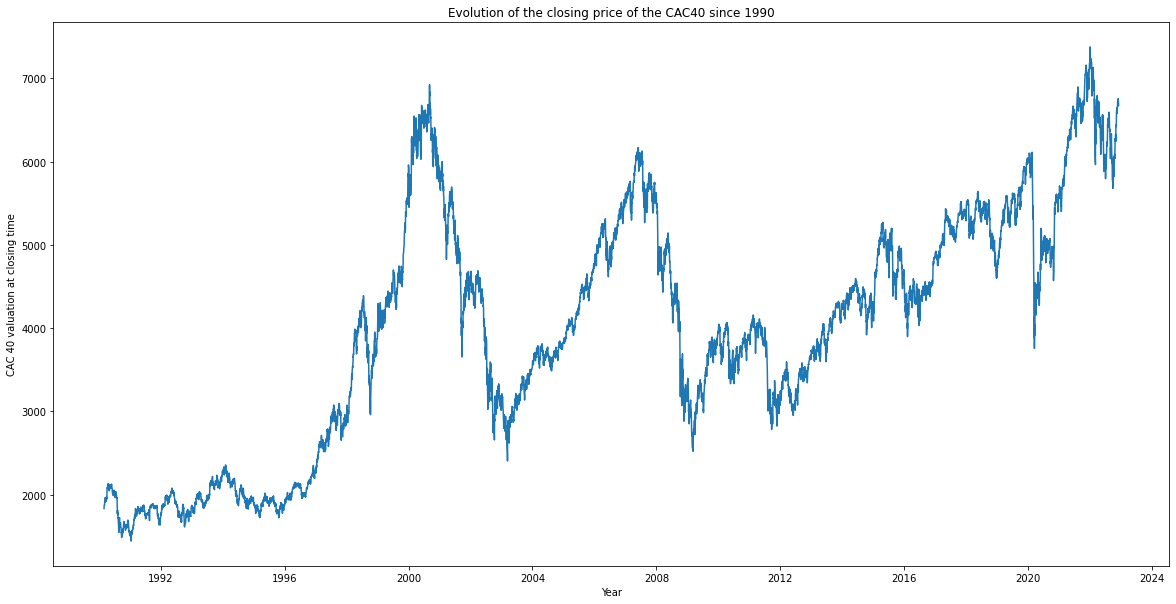

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(cac40['Close'])
plt.ylabel('CAC 40 valuation at closing time')
plt.xlabel('Year')
plt.title('Evolution of the closing price of the CAC40 since 1990')
plt.show()

### We can also plot the Moving averages for different periods, as this also yields some useful information for quantitative analyst.

In [ ]:
cac40_ma = cac40.copy()
for i in range(10,40,10):
  cac40_ma[f'Moving Avg for {i} days'] = cac40_ma['Close'].rolling(i).mean()

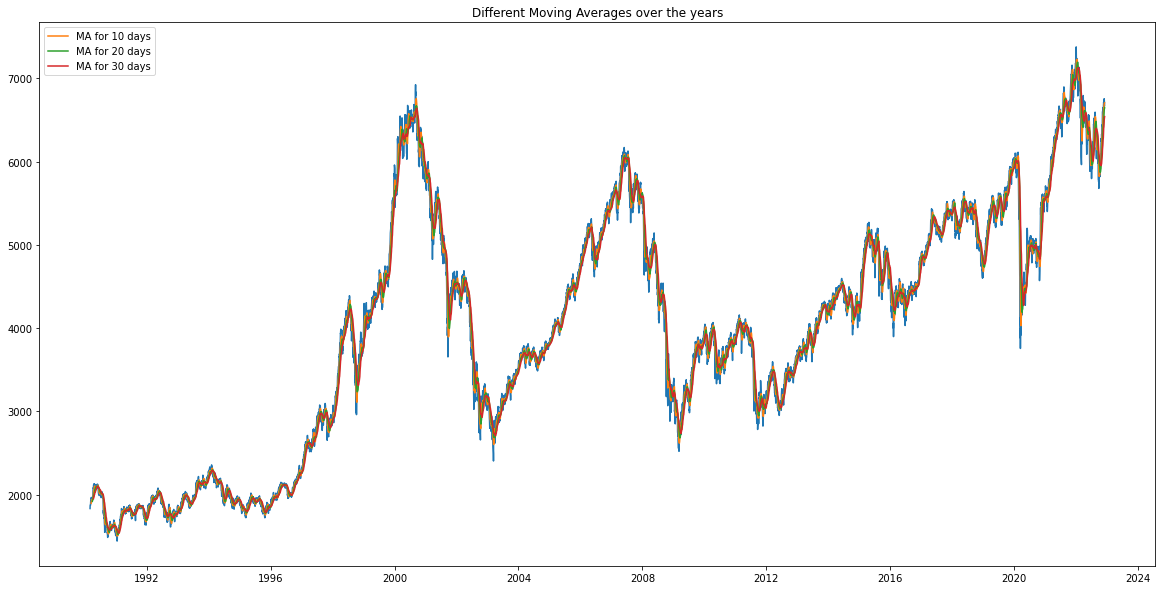

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(cac40_ma['Close'])
plt.plot(cac40_ma['Moving Avg for 10 days'], label='MA for 10 days')
plt.plot(cac40_ma['Moving Avg for 20 days'], label='MA for 20 days')
plt.plot(cac40_ma['Moving Avg for 30 days'], label='MA for 30 days')
plt.title('Different Moving Averages over the years')
plt.legend()
plt.show()


### We are going to create a new colum, called 'Future', which is simply the closing price shifted one day into the future. We will use this feature to build our model, but more on that later.

In [ ]:
cac40["Future"] = cac40["Close"].shift(-1)

In [ ]:
cac40.head()

,Open,High,Low,Close,Volume,Future
Date,,,,,,
1990-03-01 00:00:00+01:00,1836.0,1838.0,1827.0,1832.0,0,1860.0
1990-03-02 00:00:00+01:00,1831.0,1860.0,1831.0,1860.0,0,1874.0
1990-03-05 00:00:00+01:00,1866.0,1874.0,1862.0,1874.0,0,1872.0
1990-03-06 00:00:00+01:00,1869.0,1875.0,1866.0,1872.0,0,1880.0
1990-03-07 00:00:00+01:00,1874.0,1881.0,1874.0,1880.0,0,1917.0


### Since we will be using a supervised approach at first (we have a prediction problem so a supervised approach is recommended), we create a new column, 'Target', which will simply tell us if the Future price was greater than the one at closing time or not. In our case, we  care by how much the stock went up or down compared to the closing price, rather than simply learning the trend, that is why we use a Random Forest Regressor instead of the classifier

In [ ]:
cac40['Target'] = np.where(cac40['Future']>cac40['Close'], 1, 0)

In [ ]:
cac40.head()

,Open,High,Low,Close,Volume,Future,Target
Date,,,,,,,
1990-03-01 00:00:00+01:00,1836.0,1838.0,1827.0,1832.0,0,1860.0,1
1990-03-02 00:00:00+01:00,1831.0,1860.0,1831.0,1860.0,0,1874.0,1
1990-03-05 00:00:00+01:00,1866.0,1874.0,1862.0,1874.0,0,1872.0,0
1990-03-06 00:00:00+01:00,1869.0,1875.0,1866.0,1872.0,0,1880.0,1
1990-03-07 00:00:00+01:00,1874.0,1881.0,1874.0,1880.0,0,1917.0,1


# PART 3: BUILDING, OPTIMISING & TESTING A SUPERVISED MODEL

## Why a Random Forest Regressor ?       
### A random Forest Regressor is a good baseline model for our case: we want to predict the Future price given the closing price as well as other predictors. This model is great because it's easy to explain, and we can do some quick hyperparameter tuning by using GridSearch from sklearn. After, we will compare this baseline model with our LSTM :) .

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

### We do a 80/20 split for our training and testing data.

In [ ]:
train_len = int(0.8*len(cac40))
test_len = int(len(cac40) - train_len)
print(train_len, test_len)

6654 1664


In [ ]:
train_data = cac40.iloc[:-test_len]
test_data = cac40.iloc[-test_len:]

In [ ]:
train_data.head()

,Open,High,Low,Close,Volume,Future,Target
Date,,,,,,,
1990-03-01 00:00:00+01:00,1836.0,1838.0,1827.0,1832.0,0,1860.0,1
1990-03-02 00:00:00+01:00,1831.0,1860.0,1831.0,1860.0,0,1874.0,1
1990-03-05 00:00:00+01:00,1866.0,1874.0,1862.0,1874.0,0,1872.0,0
1990-03-06 00:00:00+01:00,1869.0,1875.0,1866.0,1872.0,0,1880.0,1
1990-03-07 00:00:00+01:00,1874.0,1881.0,1874.0,1880.0,0,1917.0,1


In [ ]:
test_data.head()

,Open,High,Low,Close,Volume,Future,Target
Date,,,,,,,
2016-06-13 00:00:00+02:00,4253.979980,4275.970215,4227.020020,4227.020020,115884600,4130.330078,0
2016-06-14 00:00:00+02:00,4175.209961,4199.540039,4127.870117,4130.330078,136119700,4171.580078,1
2016-06-15 00:00:00+02:00,4172.729980,4204.009766,4162.020020,4171.580078,122586800,4153.009766,0
2016-06-16 00:00:00+02:00,4116.500000,4162.370117,4109.819824,4153.009766,117520700,4193.830078,1
2016-06-17 00:00:00+02:00,4179.439941,4218.529785,4170.169922,4193.830078,196645100,4340.759766,1


In [ ]:
train_data.shape

(6654, 7)

### We drop the last row because we wouldn't have a Future value, which will raise an error during the prediction

In [ ]:
test_data.drop(test_data.tail(1).index, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### We keep all columns except the Target and Future value. The reason is quite simple: we don't use Future as a predictor because that would mean we are cheating: we would fit the model with data that we shouldn't and couldn't have because the event hasn't happened yet.

In [ ]:
model = RandomForestRegressor()

In [ ]:
predictors = ['Open',	'High',	'Low','Close']

### We create a simple Random Forest Regressor, on which we will do some hyperparameter tuning to have the best model possible

In [ ]:
model.fit(train_data[predictors], train_data['Future'])

RandomForestRegressor()

In [ ]:
predictions = pd.Series(model.predict(test_data[predictors]), 
                        index=test_data.index)

In [ ]:
print(mean_squared_error(test_data['Future'], predictions))
print(mean_squared_error(test_data['Future'], predictions, squared=False))


7925.860029718041
89.02729935091843


In [ ]:
parameters = {
    "n_estimators":[100,250,500],
    "max_depth":range(2,6,2),
    "min_samples_leaf":range(2,6,2),
    "min_samples_split":range(2,6,2)
}

In [ ]:
#grid_search = GridSearchCV(estimator=model, 
 #                          param_grid=parameters,
  #                         cv=4)

In [ ]:
#grid_search.fit(train_data[predictors], train_data['Target'])

In [ ]:
#grid_search.best_params_

In [ ]:
model = RandomForestRegressor(max_depth=2,
                              min_samples_leaf=4,
                              min_samples_split=4,
                              n_estimators=100)

model.fit(train_data[predictors], train_data['Future'])

predictions = pd.Series(model.predict(test_data[predictors]), 
                        index=test_data.index)

print(mean_squared_error(test_data['Future'], predictions))
print(mean_squared_error(test_data['Future'], predictions, squared=False))

386016.8674933395
621.3025571276361


## PART 4: BUILDING A LSTM 

### A LSTM is the obvious choice for our situation. Since we are doing a Time Series prediction, we need to make predictions for the near future; while also taking into accounts the big trends of the past. An LSTM works by using a series of "gates", which help him either to forget or to keep data, unlike more "traditional" RNN which don't have these features.     
### We are going to procede with the same steps as above, with some modifications. We are going to only keep the closing price, as this is the only data that the LSTM is going to need. We are also scaling the data with a MinMaxScaler (a StandardScaler could have also been used)

In [ ]:
lstm_data = cac40[['Close']]

In [ ]:
lstm_data.index = lstm_data.index.date

In [ ]:
lstm_data = lstm_data.values

In [ ]:
train_len = int(np.ceil(len(lstm_data)*.8))
val_len = len(lstm_data) - train_len

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
lstm_scaled = scaler.fit_transform(lstm_data)
lstm_scaled

array([[0.06587626],
       [0.07059374],
       [0.07295249],
       ...,
       [0.8931625 ],
       [0.88553196],
       [0.88204272]])

In [ ]:
lstm_train = lstm_scaled[0:train_len, :]
lstm_val = lstm_scaled[train_len-10:, :]

In [ ]:
x_train, y_train = [], []
x_test, y_test = [], []

In [ ]:
for i in range(10, train_len):
  x_train.append(lstm_train[i-10:i,0])
  y_train.append(lstm_train[i,0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1)) # Converts to a Tensor like object

In [ ]:
y_test = lstm_data[train_len+10:, :]
for i in range(10, val_len):
  x_test.append(lstm_val[i-10:i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation

## We are going to experiment with two different LSTM architectures.    
### The first is rather simple: we are going to have two LSTM layers, followed by two dense layers which are going to give us the predicted closing price. Then, we transform the data back to its original scale.     
### The second model is more complex: We have two LSTM layers, followed by a Dropout layer, then another two LSTM layers and then finally two Dense Layers. The goal here is to compare which is better in terms of prediction accuracy and training speed.      
### Both these model use "adam" as optimizer and MSE as the loss function, as they are what yielded the best results for me.

In [ ]:
model_1 = Sequential()
model_1.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model_1.add(LSTM(64, return_sequences=False))
model_1.add(Dense(1))
model_1.compile(optimizer='adam', loss='mean_squared_error')
history_model_1 = model_1.fit(x_train, y_train, batch_size=1, epochs=10)


Epoch 1/10
6645/6645 [==============================] - 65s 9ms/step - loss: 6.0605e-04
Epoch 2/10
6645/6645 [==============================] - 62s 9ms/step - loss: 2.2194e-04
Epoch 3/10
6645/6645 [==============================] - 60s 9ms/step - loss: 1.8250e-04
Epoch 4/10
6645/6645 [==============================] - 61s 9ms/step - loss: 1.6718e-04
Epoch 5/10
6645/6645 [==============================] - 61s 9ms/step - loss: 1.5610e-04
Epoch 6/10
6645/6645 [==============================] - 62s 9ms/step - loss: 1.4479e-04
Epoch 7/10
6645/6645 [==============================] - 60s 9ms/step - loss: 1.3533e-04
Epoch 8/10
6645/6645 [==============================] - 61s 9ms/step - loss: 1.3200e-04
Epoch 9/10
6645/6645 [==============================] - 61s 9ms/step - loss: 1.3201e-04
Epoch 10/10
6645/6645 [==============================] - 62s 9ms/step - loss: 1.2717e-04


In [ ]:
predictions_model_1 = scaler.inverse_transform(model_1.predict(x_test))
print(predictions_model_1)
mse_model_1 = mean_squared_error(predictions_model_1, y_test)
rmse_model_1 = np.sqrt(np.mean(((predictions_model_1-y_test)**2)))
print(f'The MSE is {mse_model_1} and RMSE is {rmse_model_1} for the first model')

52/52 [==============================] - 1s 10ms/step
[[4267.664 ]
 [4169.038 ]
 [4215.952 ]
 ...
 [6633.2627]
 [6698.8696]
 [6688.143 ]]
The MSE is 51242.724210393986 and RMSE is 226.36855835206882 for the first model


In [ ]:
model_2 = Sequential()
model_2.add(LSTM(256, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model_2.add(LSTM(128, return_sequences=True))
model_2.add(Dropout(0.2))
model_2.add(LSTM(64, return_sequences=True))
model_2.add(LSTM(32, return_sequences=False))
model_2.add(Dense(25))
model_2.add(Dense(1))
model_2.compile(optimizer='adam', loss='mean_squared_error')
history_model_2 = model_2.fit(x_train, y_train, batch_size=1, epochs=1)


6645/6645 [==============================] - 172s 25ms/step - loss: 0.0013


In [ ]:
predictions_model_2 = scaler.inverse_transform(model_2.predict(x_test))
print(predictions_model_2)
mse_model_2 = mean_squared_error(predictions_model_2, y_test)
rmse_model_2 = np.sqrt(np.mean(((predictions_model_2-y_test)**2)))
print(f'The MSE is {mse_model_2} and RMSE is {rmse_model_2} for the second model')

52/52 [==============================] - 3s 25ms/step
[[4258.134 ]
 [4207.0684]
 [4167.015 ]
 ...
 [6260.2188]
 [6273.8345]
 [6287.6523]]
The MSE is 104839.5565713758 and RMSE is 323.7893706893044 for the second model


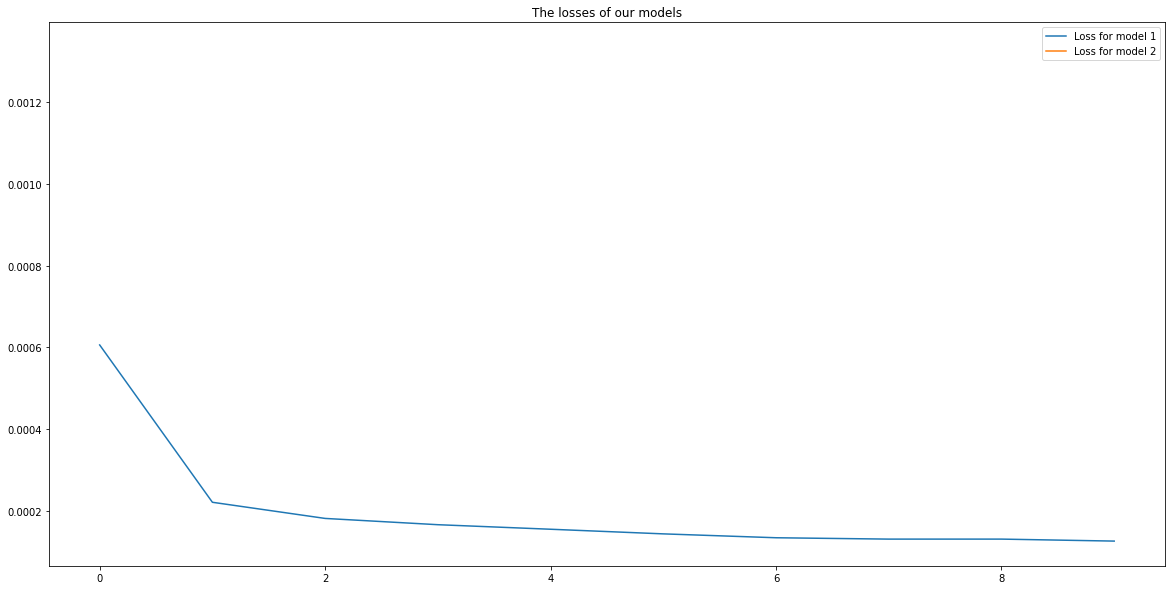

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(history_model_1.history['loss'], label='Loss for model 1')
plt.plot(history_model_2.history['loss'], label='Loss for model 2')
plt.title('The losses of our models')
plt.legend()
plt.show()